In [0]:
import os
import matplotlib.pyplot as plt

In [3]:
try:
  %tensorflow_version 2.x # enable TF 2.x in Colab
except Exception:
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # enable TF 2.x in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
colab_root = "/content/drive/My\ Drive"

In [0]:
cell_images_folder = os.path.join(colab_root, "cell_images.zip")
images_folder = os.path.join(colab_root, '')

In [0]:
!unzip -q $cell_images_folder -d $images_folder

In [9]:
import pathlib
train_dir = '/content/drive/My Drive/cell_images/train'
test_dir = '/content/drive/My Drive/cell_images/test'
print("Train Directory: ", train_dir)
print("Test Directory: ", test_dir)

Train Directory:  /content/drive/My Drive/cell_images/train
Test Directory:  /content/drive/My Drive/cell_images/test


In [0]:
IMG_SIZE = 64

In [11]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
      
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 20668 images belonging to 2 classes.
Found 6890 images belonging to 2 classes.
data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


In [12]:
print(train_generator.class_indices)

{'Parasitized': 0, 'Uninfected': 1}


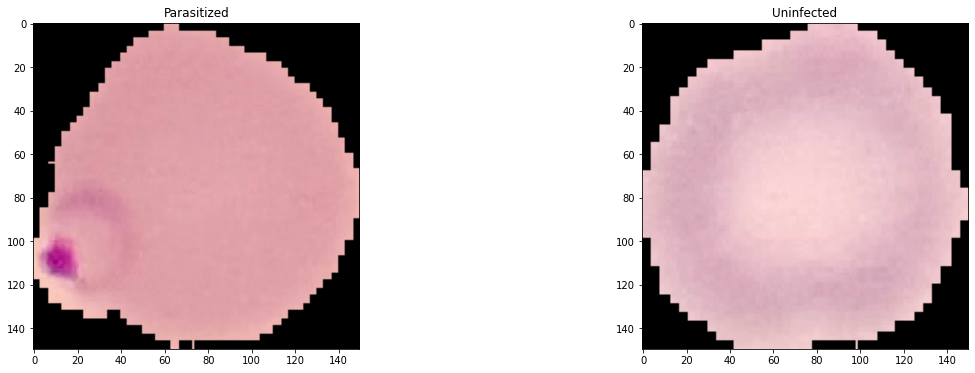

<Figure size 432x288 with 0 Axes>

In [0]:
from tensorflow.keras.preprocessing import image
import os
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))

parasitized_dir = os.path.join(train_dir, 'Parasitized')
fnames = [os.path.join(parasitized_dir, fname) for fname in os.listdir(parasitized_dir)]

# [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# train_cats_dir = os.path.join(train_dir, 'cats')

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0


for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = ax[0].imshow(image.array_to_img(batch[0]))
    ax[0].set_title('Parasitized')
    i += 1
    if i % 1 == 0:
        break

uninfected_dir = os.path.join(train_dir, 'Uninfected')
fnames = [os.path.join(uninfected_dir, fname) for fname in os.listdir(uninfected_dir)]

# [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# train_cats_dir = os.path.join(train_dir, 'cats')

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0


for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = ax[1].imshow(image.array_to_img(batch[0]))
    ax[1].set_title('Uninfected')
    i += 1
    if i % 1 == 0:
        break

plt.show()

In [0]:
from tensorflow.keras import datasets, layers, models

# 3.1 - Without BatchNormalization

In [0]:
classifier = models.Sequential()
#Adding 1st Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(layers.Flatten())

classifier.add(layers.Dense(units=128,activation='relu'))
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
accuracies = classifier.fit (train_generator,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = validation_generator,
                         validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6865 - accuracy: 0.5384 - val_loss: 0.5847 - val_accuracy: 0.8550
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4260 - accuracy: 0.8181 - val_loss: 0.1926 - val_accuracy: 0.9331
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.1988 - accuracy: 0.9331 - val_loss: 0.1798 - val_accuracy: 0.9281
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1552 - accuracy: 0.9500 - val_loss: 0.1030 - val_accuracy: 0.9475
Epoch 5/30
100/100 [==============================] - 13s 127ms/step - loss: 0.1643 - accuracy: 0.9487 - val_loss: 0.4282 - val_accuracy: 0.9461
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.1409 - accuracy: 0.9569 - val_loss: 0.0891 - val_accuracy: 0.9494
Epoch 7/30
100/100 [==============================] - 11s 113ms/step - loss: 0.1452 - accuracy: 0.9563 - val_loss: 0.2648 - val_ac

# 3.1 - With BatchNormalization

In [0]:
classifier_bnorm = models.Sequential()
#Adding 1st Convolution and Pooling Layer
classifier_bnorm.add(layers.Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier_bnorm.add(layers.BatchNormalization())
classifier_bnorm.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier_bnorm.add(layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier_bnorm.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier_bnorm.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier_bnorm.add(layers.BatchNormalization())
classifier_bnorm.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier_bnorm.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier_bnorm.add(layers.MaxPool2D(pool_size=(2,2)))

#Flattening
classifier_bnorm.add(layers.Flatten())

classifier_bnorm.add(layers.Dense(units=128,activation='relu'))
classifier_bnorm.add(layers.Dense(units = 1, activation = 'sigmoid'))

classifier_bnorm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
accuracies_bnorm = classifier_bnorm.fit(train_generator,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = validation_generator,
                         validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5131 - accuracy: 0.7337 - val_loss: 0.7234 - val_accuracy: 0.4842
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.2267 - accuracy: 0.9147 - val_loss: 0.9833 - val_accuracy: 0.5019
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.1768 - accuracy: 0.9378 - val_loss: 0.5339 - val_accuracy: 0.7194
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.1615 - accuracy: 0.9474 - val_loss: 0.4395 - val_accuracy: 0.7975
Epoch 5/30
100/100 [==============================] - 11s 112ms/step - loss: 0.1422 - accuracy: 0.9544 - val_loss: 0.2490 - val_accuracy: 0.9068
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.2291 - val_accuracy: 0.9187
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1637 - accuracy: 0.9488 - val_loss: 0.2261 - val_ac

Tried multiple combinations of BatchNormalization layers and found that adding BatchNormalization layers after the first and the third Conv2D layer is giving a good accuracy and lower validation loss value, but still the loss and accuracy values are better without a BatchNormalization layer. Hence proceeding further without a BatchNormalization layer. Please find below the scores that I got trying various combinations of BatchNormalization. 

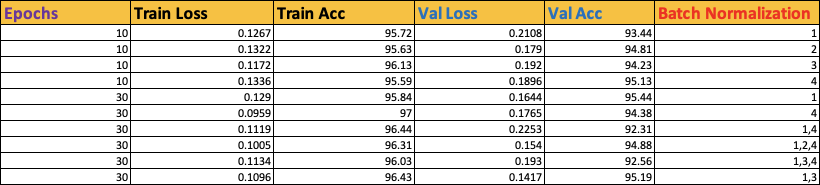

# 3.2 - Data Augmentation

In [25]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=45,
      # width_shift_range=0.2,
      # height_shift_range=0.2,
      # zoom_range=0.2,
      shear_range=0.2,
      vertical_flip=True,
      horizontal_flip=True,) # set validation split
      
valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 20668 images belonging to 2 classes.
Found 6890 images belonging to 2 classes.
data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


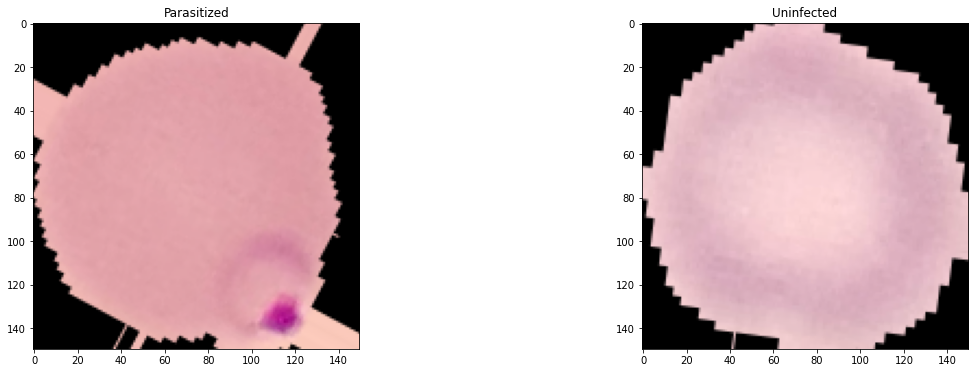

<Figure size 432x288 with 0 Axes>

In [26]:
from tensorflow.keras.preprocessing import image
import os
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))

parasitized_dir = os.path.join(train_dir, 'Parasitized')
fnames = [os.path.join(parasitized_dir, fname) for fname in os.listdir(parasitized_dir)]

# [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# train_cats_dir = os.path.join(train_dir, 'cats')

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0


for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = ax[0].imshow(image.array_to_img(batch[0]))
    ax[0].set_title('Parasitized')
    i += 1
    if i % 1 == 0:
        break

uninfected_dir = os.path.join(train_dir, 'Uninfected')
fnames = [os.path.join(uninfected_dir, fname) for fname in os.listdir(uninfected_dir)]

# [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# train_cats_dir = os.path.join(train_dir, 'cats')

# We pick one image to "augment"
img_path = fnames[5]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0


for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = ax[1].imshow(image.array_to_img(batch[0]))
    ax[1].set_title('Uninfected')
    i += 1
    if i % 1 == 0:
        break

plt.show()

In [0]:
classifier = models.Sequential()
#Adding 1st Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(layers.Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(layers.MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(layers.Flatten())

classifier.add(layers.Dense(units=128,activation='relu'))
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
accuracies = classifier.fit (train_generator,
                         steps_per_epoch = 200,
                         epochs = 20,
                         validation_data = validation_generator,
                         validation_steps = 100)

Epoch 1/20
200/200 [==============================] - 28s 139ms/step - loss: 0.5965 - accuracy: 0.6494 - val_loss: 0.3445 - val_accuracy: 0.8778
Epoch 2/20
200/200 [==============================] - 29s 144ms/step - loss: 0.2510 - accuracy: 0.9116 - val_loss: 0.2849 - val_accuracy: 0.9266
Epoch 3/20
200/200 [==============================] - 28s 139ms/step - loss: 0.1973 - accuracy: 0.9371 - val_loss: 0.2630 - val_accuracy: 0.9336
Epoch 4/20
200/200 [==============================] - 28s 139ms/step - loss: 0.1769 - accuracy: 0.9456 - val_loss: 0.2251 - val_accuracy: 0.9303
Epoch 5/20
200/200 [==============================] - 28s 141ms/step - loss: 0.1476 - accuracy: 0.9536 - val_loss: 0.2086 - val_accuracy: 0.9487
Epoch 6/20
200/200 [==============================] - 28s 141ms/step - loss: 0.1545 - accuracy: 0.9526 - val_loss: 0.1763 - val_accuracy: 0.9531
Epoch 7/20
200/200 [==============================] - 28s 138ms/step - loss: 0.1547 - accuracy: 0.9506 - val_loss: 0.1973 - val_ac

There is not much improvement on the loss and accuracy.

# 3.3 - Residual Connections

With Residual Connections

In [34]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Add, Dense
from keras.models import Model

inputs = Input(shape=(64, 64, 3))
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1_1)

maxpool1 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv1_2)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)

skip2 = Add()([maxpool1, conv2_2])
maxpool2 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip2)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)

skip3 = Add()([maxpool2, conv3_2])
maxpool3 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip3)
conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)

skip4 = Add()([maxpool3, conv4_2])
maxpool4 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip4)
conv5_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5_1)


skip5 = Add()([maxpool4, conv5_2])
maxpool5 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip5)
conv6_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool5)
conv6_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6_1)


skip6 = Add()([maxpool5, conv6_2])
maxpool6 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip6)
conv7_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool6)
conv7_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7_1)


skip7 = Add()([maxpool6, conv7_2])
maxpool7 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip7)
conv8_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool7)
conv8_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8_1)

skip8 = Add()([maxpool7, conv8_2])
maxpool8 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip8)
conv9_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool8)
conv9_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9_1)

skip9 = Add()([maxpool8, conv9_2])
maxpool9 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip9)
conv10_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool9)
conv10_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv10_1)


skip10 = Add()([maxpool9, conv10_2])
maxpool10 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip10)
conv11_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool10)
conv11_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv11_1)

skip11 = Add()([maxpool10, conv11_2])
maxpool11 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip11)
conv12_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool11)
conv12_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv12_1)

skip12 = Add()([maxpool11, conv12_2])
maxpool12 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip12)
conv13_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool12)
conv13_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv13_1)


skip13 = Add()([maxpool12, conv13_2])
maxpool13 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip13)
conv14_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool13)
conv14_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv14_1)

skip14 = Add()([maxpool13, conv14_2])
maxpool14 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip14)
conv15_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool14)
conv15_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv15_1)

skip15 = Add()([maxpool14, conv15_2])
maxpool15 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip15)
conv16_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool15)
conv16_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv16_1)

skip16 = Add()([maxpool15, conv16_2])
maxpool16 = MaxPooling2D(pool_size=(2, 2),padding='same')(skip16)

flat = Flatten()(maxpool16)
dense = Dense(units = 128, activation='relu')(flat)
predictions = Dense(units=1, activation='sigmoid')(dense)
model = Model(inputs=inputs, outputs=predictions)

Using TensorFlow backend.


In [35]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

residual = model.fit (train_generator,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = validation_generator,
                         validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6929 - accuracy: 0.5206 - val_loss: 0.6949 - val_accuracy: 0.4631
Epoch 2/30
100/100 [==============================] - 14s 141ms/step - loss: 0.3088 - accuracy: 0.8931 - val_loss: 0.1702 - val_accuracy: 0.9556
Epoch 3/30
100/100 [==============================] - 14s 144ms/step - loss: 0.1573 - accuracy: 0.9509 - val_loss: 0.1412 - val_accuracy: 0.9588
Epoch 4/30
100/100 [==============================] - 14s 139ms/step - loss: 0.1524 - accuracy: 0.9538 - val_loss: 0.2501 - val_accuracy: 0.9494
Epoch 5/30
100/100 [==============================] - 15s 152ms/step - loss: 0.1437 - accuracy: 0.9556 - val_loss: 0.2019 - val_accuracy: 0.9550
Epoch 6/30
100/100 [==============================] - 14s 141ms/step - loss: 0.1356 - accuracy: 0.9584 - val_loss: 0.0592 - val_accuracy: 0.9538
Epoch 7/30
100/100 [==============================] - 15s 151ms/step - loss: 0.1507 - accuracy: 0.9509 - val_loss: 0.0154 - val_ac

Without Residual Connections

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Add, Dense
from keras.models import Model

inputs = Input(shape=(64, 64, 3))
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1_1)

maxpool1 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv1_2)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)

# skip2 = Add()([maxpool1, conv2_2])
maxpool2 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv2_2)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)

# skip3 = Add()([maxpool2, conv3_2])
maxpool3 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv3_2)
conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)

# skip4 = Add()([maxpool3, conv4_2])
maxpool4 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv4_2)
conv5_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5_1)


# skip5 = Add()([maxpool4, conv5_2])
maxpool5 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv5_2)
conv6_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool5)
conv6_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6_1)


# skip6 = Add()([maxpool5, conv6_2])
maxpool6 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv6_2)
conv7_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool6)
conv7_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7_1)


# skip7 = Add()([maxpool6, conv7_2])
maxpool7 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv7_2)
conv8_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool7)
conv8_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8_1)

# skip8 = Add()([maxpool7, conv8_2])
maxpool8 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv8_2)
conv9_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool8)
conv9_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9_1)

# skip9 = Add()([maxpool8, conv9_2])
maxpool9 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv9_2)
conv10_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool9)
conv10_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv10_1)


# skip10 = Add()([maxpool9, conv10_2])
maxpool10 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv10_2)
conv11_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool10)
conv11_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv11_1)

# skip11 = Add()([maxpool10, conv11_2])
maxpool11 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv11_2)
conv12_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool11)
conv12_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv12_1)

# skip12 = Add()([maxpool11, conv12_2])
maxpool12 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv12_2)
conv13_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool12)
conv13_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv13_1)


# skip13 = Add()([maxpool12, conv13_2])
maxpool13 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv13_2)
conv14_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool13)
conv14_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv14_1)

# skip14 = Add()([maxpool13, conv14_2])
maxpool14 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv14_2)
conv15_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool14)
conv15_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv15_1)

# skip15 = Add()([maxpool14, conv15_2])
maxpool15 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv15_2)
conv16_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool15)
conv16_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv16_1)

# skip16 = Add()([maxpool15, conv16_2])
maxpool16 = MaxPooling2D(pool_size=(2, 2),padding='same')(conv16_2)

flat = Flatten()(maxpool16)
dense = Dense(units = 128, activation='relu')(flat)
predictions = Dense(units=1, activation='sigmoid')(dense)
model = Model(inputs=inputs, outputs=predictions)

In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

non_residual = model.fit (train_generator,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = validation_generator,
                         validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6936 - val_accuracy: 0.4950
Epoch 2/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6940 - val_accuracy: 0.4969
Epoch 3/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 4/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6934 - accuracy: 0.4819 - val_loss: 0.6930 - val_accuracy: 0.5113
Epoch 5/30
100/100 [==============================] - 14s 141ms/step - loss: 0.6932 - accuracy: 0.4850 - val_loss: 0.6925 - val_accuracy: 0.5095
Epoch 6/30
100/100 [==============================] - 15s 152ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6929 - val_accuracy: 0.4831
Epoch 7/30
100/100 [==============================] - 14s 141ms/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6936 - val_ac

The model is suffereing to learn wihtout a residual connection. We can see that the training accuracy and the validation accuracy are very low here whereas the other deep neural model with residual connections, was able to give us **96.00%** validation accuracy.

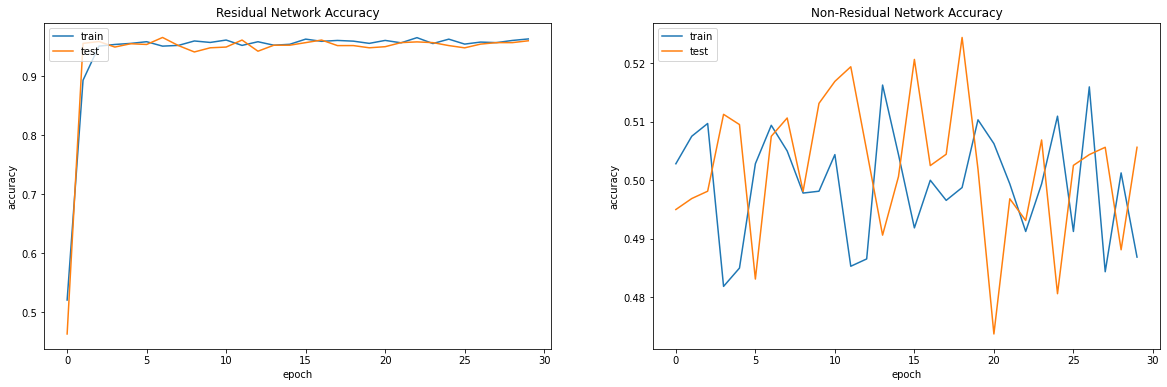

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 6))
epochs = range(len(residual.history['accuracy']))

ax[0].plot(epochs, residual.history['accuracy'])
ax[0].plot(epochs, residual.history['val_accuracy'])
ax[0].set_title('Residual Network Accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')


ax[1].plot(epochs, non_residual.history['accuracy'])
ax[1].plot(epochs, non_residual.history['val_accuracy'])
ax[1].set_title('Non-Residual Network Accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')



plt.show()


We can see the huge difference in accuracies between a residual and a non-residual network in the above plots.

# 3.4 - Transfer Learning

In [0]:
IMG_SIZE = 64
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)


In [106]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest') # set validation split
      
valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 20668 images belonging to 2 classes.
Found 6890 images belonging to 2 classes.
data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


In [0]:
conv_base = tf.keras.applications.resnet.ResNet50(input_shape=(IMG_SHAPE),include_top=False, weights='imagenet')

In [108]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Retraining only the Densely connected layer**



In [0]:
conv_base.trainable = False

In [114]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/10
100/100 [==============================] - 16s 159ms/step - loss: 0.7333 - accuracy: 0.4944 - val_loss: 0.6912 - val_accuracy: 0.4969
Epoch 2/10
100/100 [==============================] - 16s 164ms/step - loss: 0.7104 - accuracy: 0.5153 - val_loss: 0.7666 - val_accuracy: 0.4981
Epoch 3/10
100/100 [==============================] - 16s 164ms/step - loss: 0.7007 - accuracy: 0.5013 - val_loss: 0.6867 - val_accuracy: 0.5113
Epoch 4/10
100/100 [==============================] - 15s 150ms/step - loss: 0.6962 - accuracy: 0.5172 - val_loss: 0.6907 - val_accuracy: 0.4900
Epoch 5/10
100/100 [==============================] - 15s 149ms/step - loss: 0.6968 - accuracy: 0.5122 - val_loss: 0.6829 - val_accuracy: 0.5387
Epoch 6/10
100/100 [==============================] - 16s 163ms/step - loss: 0.6980 - accuracy: 0.5294 - val_loss: 0.6866 - val_accuracy: 0.5106
Epoch 7/10
100/100 [==============================] - 15s 149ms/step - loss: 0.6988 - accuracy: 0.5216 - val_loss: 0.6889 - val_ac

**Fine-tuning the whole network**

In [0]:
conv_base.trainable = True

In [117]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/30
100/100 [==============================] - 17s 168ms/step - loss: 0.2346 - accuracy: 0.9247 - val_loss: 1.3129 - val_accuracy: 0.7956
Epoch 2/30
100/100 [==============================] - 16s 163ms/step - loss: 0.2219 - accuracy: 0.9216 - val_loss: 1.9337 - val_accuracy: 0.9480
Epoch 3/30
100/100 [==============================] - 16s 161ms/step - loss: 0.2431 - accuracy: 0.9169 - val_loss: 39.1345 - val_accuracy: 0.8569
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.2127 - accuracy: 0.9272 - val_loss: 3.1975 - val_accuracy: 0.9606
Epoch 5/30
100/100 [==============================] - 17s 166ms/step - loss: 0.2003 - accuracy: 0.9274 - val_loss: 0.2008 - val_accuracy: 0.9463
Epoch 6/30
100/100 [==============================] - 17s 172ms/step - loss: 0.1930 - accuracy: 0.9253 - val_loss: 0.3343 - val_accuracy: 0.9518
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4487 - accuracy: 0.8913 - val_loss: 14.3987 - val_

The accuracies were very low when we trained only the densely connected layer, but when we fine-tuned the whole Resnet50 network, the validation accuracy when upto 96.06%. Fine-tuning and adjusting the weights according to our dataset, helps to improve the scores really well.